In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import gc

I will run this on a per image basis. This means that I will load all pictures of one 3d image and store them in one array. I will write this out.

Create the file-names per image

In [8]:
def create_filenames(pic,
                     x_start = 15,
                     x_end = 300,
                     y_start = 50,
                     y_end = 280,
                     z_start = 40,
                     z_end = 220):

    # Initialize lists # 
    names_y = list()
    names_x = list()



    for x in range(x_start, x_end):
        names_y.append("P" + str(pic) + "_slicex" + str(x) + ".png")
        names_x.append("P" + str(pic) + "_u_slicex" + str(x) + ".png")
    for y in range(y_start, y_end):     
        names_y.append("P" + str(pic) + "_slicey" + str(y) + ".png")
        names_x.append("P" + str(pic) + "_u_slicey" + str(y) + ".png")
    for z in range(z_start, z_end):
        names_y.append("P" + str(pic) + "_slicez" + str(z) + ".png")
        names_x.append("P" + str(pic) + "_u_slicez" + str(z) + ".png")
    return [names_x, names_y]

In [21]:
a = create_filenames(10)

In [20]:
a

[['P1_u_slicex15.png',
  'P1_u_slicex16.png',
  'P1_u_slicex17.png',
  'P1_u_slicex18.png',
  'P1_u_slicex19.png',
  'P1_u_slicex20.png',
  'P1_u_slicex21.png',
  'P1_u_slicex22.png',
  'P1_u_slicex23.png',
  'P1_u_slicex24.png',
  'P1_u_slicex25.png',
  'P1_u_slicex26.png',
  'P1_u_slicex27.png',
  'P1_u_slicex28.png',
  'P1_u_slicex29.png',
  'P1_u_slicex30.png',
  'P1_u_slicex31.png',
  'P1_u_slicex32.png',
  'P1_u_slicex33.png',
  'P1_u_slicex34.png',
  'P1_u_slicex35.png',
  'P1_u_slicex36.png',
  'P1_u_slicex37.png',
  'P1_u_slicex38.png',
  'P1_u_slicex39.png',
  'P1_u_slicex40.png',
  'P1_u_slicex41.png',
  'P1_u_slicex42.png',
  'P1_u_slicex43.png',
  'P1_u_slicex44.png',
  'P1_u_slicex45.png',
  'P1_u_slicex46.png',
  'P1_u_slicex47.png',
  'P1_u_slicex48.png',
  'P1_u_slicex49.png',
  'P1_u_slicex50.png',
  'P1_u_slicex51.png',
  'P1_u_slicex52.png',
  'P1_u_slicex53.png',
  'P1_u_slicex54.png',
  'P1_u_slicex55.png',
  'P1_u_slicex56.png',
  'P1_u_slicex57.png',
  'P1_u_sli

Load in images

For the following program to run ...
.. it has to be in a folder where there are four subfolders:
    X: containing the spoiled images
    Y: containing the good images
    out: empty directory for the output
    out/

In [35]:
# -------------- #
# Specifications #
# -------------- #
num_pic = 21
path_x = 'Images_Y/'
path_y = 'Images_X/'
start_slice_x = 32
start_slice_y = 32
start_slice_z_1 = 32
start_slice_z_2 = 32

end_slice_x = 320 - start_slice_x
end_slice_y = 320 - start_slice_y
end_slice_z_1 = 320 - start_slice_z_1
end_slice_z_2 = 320 - start_slice_z_2

# -------------- #
#      Loop      #
# -------------- #
# create the matrices
total_images = 0
for pic in range(1,num_pic):
    # Calculate the total number of images that have to be read in.
    file_names = create_filenames(pic = pic) 
    total_images += len(file_names[1])

shape = (total_images,) + (256, 256, 1)
X = np.empty(shape,dtype = 'float32')
Y = np.empty(shape,dtype = 'float32')

iter_x = 0
iter_y = 0
for pic in range(1,num_pic):
    # Create the file names
    file_names = create_filenames(pic = pic)    
   
    # iterate over the file names and and save them to the respective filename
        # if not existing write this to a file and go on silently 
    
    ## X ## 
    # create lists for missing images
    X_missing = list()
    for x_file in file_names[0]:
        file = cv2.imread("/home/cloud/Create_Data/" + path_x + x_file)
        if (file is None):
            print("Did not find " + path_x + x_file)
            X_missing.append(x_file)
        else:
            if pic <=9:
                slicetype_x = x_file[10]
                slicetype_y_z = x_file[10]
            else:
                slicetype_x = x_file[11]
                slicetype_y_z = x_file[11]
            if (slicetype_x == 'x'):
                if (file.shape == (320,256,3)):
                    X[iter_x,:,:,:] = file[start_slice_x:end_slice_x,:,0:1] / 255
                elif (file.shape == (256, 320, 3)):
                    X[iter_x,:,:,:] = file[:,start_slice_x:end_slice_x,0:1] / 255
            elif (slicetype_y_z == 'y'):
                if (file.shape == (320,256,3)):
                    X[iter_x,:,:,:] = file[start_slice_y:end_slice_y,:,0:1] / 255
                elif (file.shape == (256, 320, 3)):
                    X[iter_x,:,:,:] = file[:,start_slice_y:end_slice_y,0:1] / 255
            elif (slicetype_y_z == 'z'):
                X[iter_x,:,:,:] = file[start_slice_z_1:end_slice_z_1, start_slice_z_2:end_slice_z_2,0:1] / 255
            else:
                print("STRANGE! pic:",pic, "file:", x_file, " slicetype was ", slicetype_y_z)
                X_missing.append("STRANGE!!!'" + x_file + "STRANGE!!!")
            iter_x += 1
    
    # save the missing list
    with open('/home/cloud/Create_Data/' + 'out/Report/' + 'P' + str(pic) + "_missingX", 'w') as f:
        for item in X_missing:
            f.write("%s\n" % item)
    
        
    ## Y ##
    Y_missing = list()    
    for y_file in file_names[1]:
        file = cv2.imread("/home/cloud/Create_Data/" + path_y + y_file)
        if (file is None):
            Y_missing.append(y_file)
        else:
            if pic <=9:
                slicetype_x = y_file[8]
                slicetype_y_z = y_file[8]
            else: 
                slicetype_x = y_file[9]
                slicetype_y_z = y_file[9]
            if (slicetype_x == 'x'):
                if (file.shape == (320,256,3)):
                    Y[iter_y,:,:,:] = file[start_slice_x:end_slice_x,:,0:1] / 255
                elif (file.shape == (256, 320, 3)):
                    Y[iter_y,:,:,:] = file[:,start_slice_x:end_slice_x,0:1] / 255
            elif (slicetype_y_z == 'y'):
                if (file.shape == (320,256,3)):
                    Y[iter_y,:,:,:] = file[start_slice_y:end_slice_y,:,0:1] / 255
                elif (file.shape == (256, 320, 3)):
                    Y[iter_y,:,:,:] = file[:,start_slice_y:end_slice_y,0:1] / 255
            elif (slicetype_y_z == 'z'):
                Y[iter_y,:,:,:] = file[start_slice_z_1:end_slice_z_1, start_slice_z_2:end_slice_z_2,0:1] / 255
            else:
                print("STRANGE! pic:",pic, "file:", y_file)
                Y_missing.append("STRANGE!!!'" + y_file + "STRANGE!!!")
            iter_y += 1
      
    
    # Save the lists of missing images
    with open('/home/cloud/Create_Data/' + 'out/Report/' + 'P' + str(pic) + "_missingY", 'w') as f:
        for item in Y_missing:
            f.write("%s\n" % item)

In [36]:
Y.shape

(13900, 256, 256, 1)

In [47]:
# Save the image
Y_name = '/home/cloud/Create_Data/' + "out/" + "Y_pois_1_9.npy"
np.save(Y_name, Y) 

# save the image
X_name = '/home/cloud/Create_Data/' + "out/" + "X_pois_1_9.npy"
np.save(X_name, X)

In [44]:
cur_pic = np.random.randint(0, Y.shape[0])

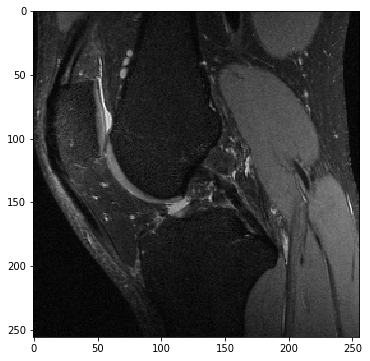

In [45]:
plt.figure(figsize = (6,6))
plt.imshow(Y[cur_pic,:,:,0], cmap='gray' )

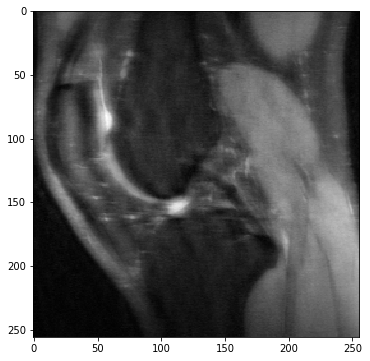

In [46]:
plt.figure(figsize = (6,6))
plt.imshow(X[cur_pic,:,:,0], cmap='gray' )

Optional: Check if really for image y 0, 1, 2 are one image and so on...

In [17]:
np.all(np.round(Y[0,:,:,:], 2) == np.round(Y[4,:,:,:], 2))

False